# Linear model for the minimum-variance control


TODO : add instances as in ANR-REM_data/AnticipationPursuit/Data_analysis/Oldies/2016-09-08%20Harris%20%26%20Wolpert_Testing%20the%20linear%20model.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
from HarrisWolpertandPursuit import MinimumVarianceControl, control_learning
from PlotFunctions import all_plots

In [ ]:
debut = time.time()
m = MinimumVarianceControl(dt = 0.001, t_R = 0.45, k = 0.0001, xT = np.array([10,0]), n_iter = 5000,record_each = 250, eta=5000, v=10.)
u, record, bangdata = control_learning(dt = 0.001, t_R = 0.45, k = 0.0001, xT = np.array([10,0]), n_iter = 5000, record_each = 250, eta=5000, v=10.)
fin = time.time()

In [8]:
fin-debut

481.3083691596985

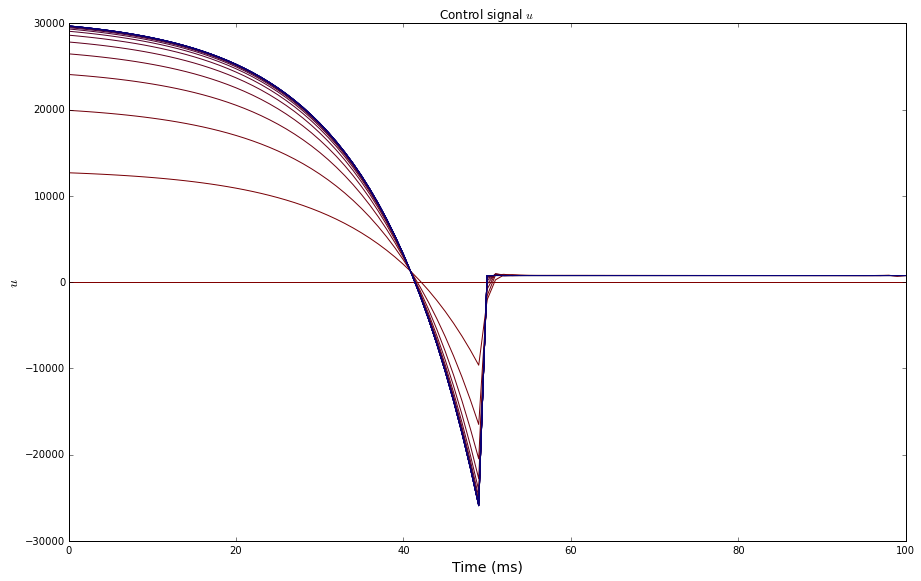

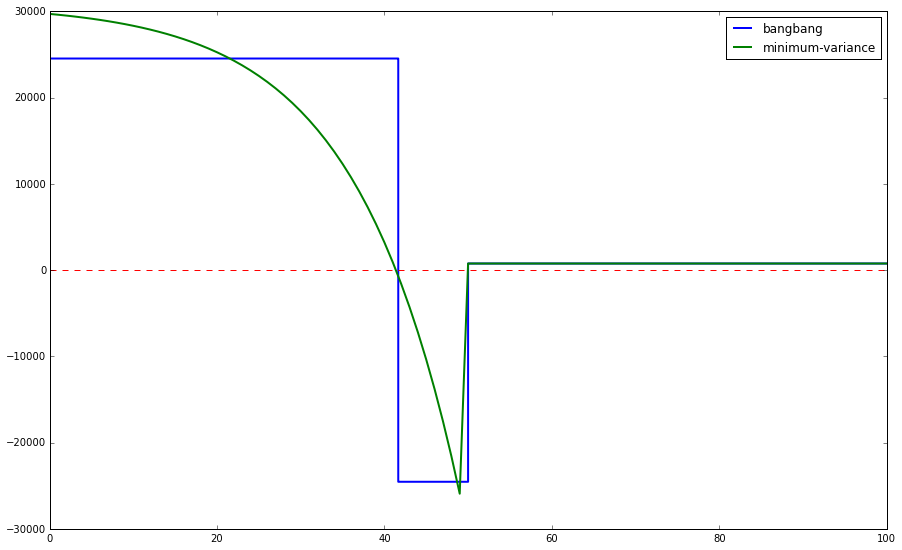

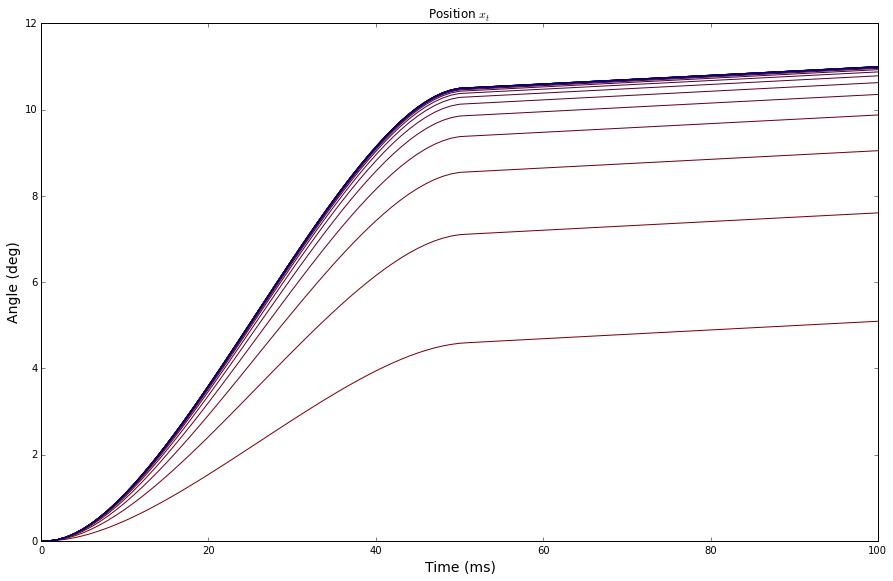

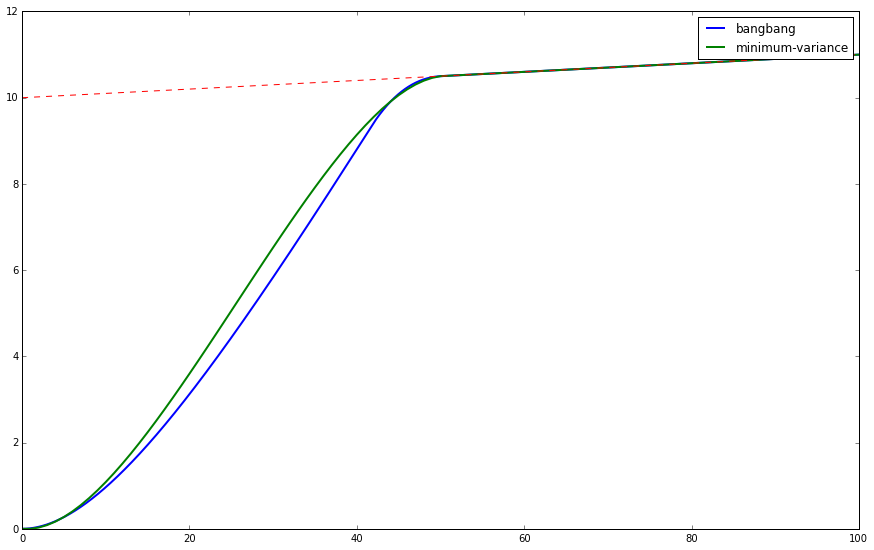

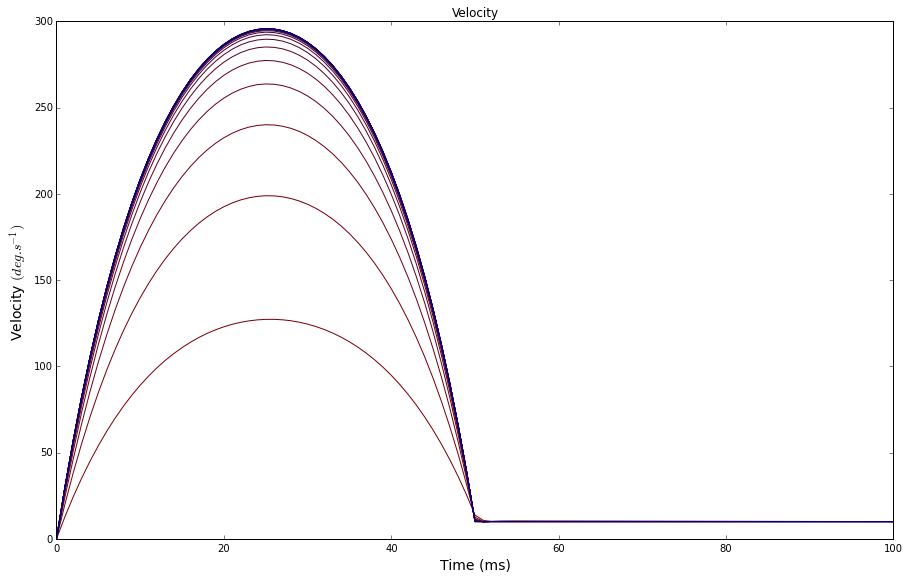

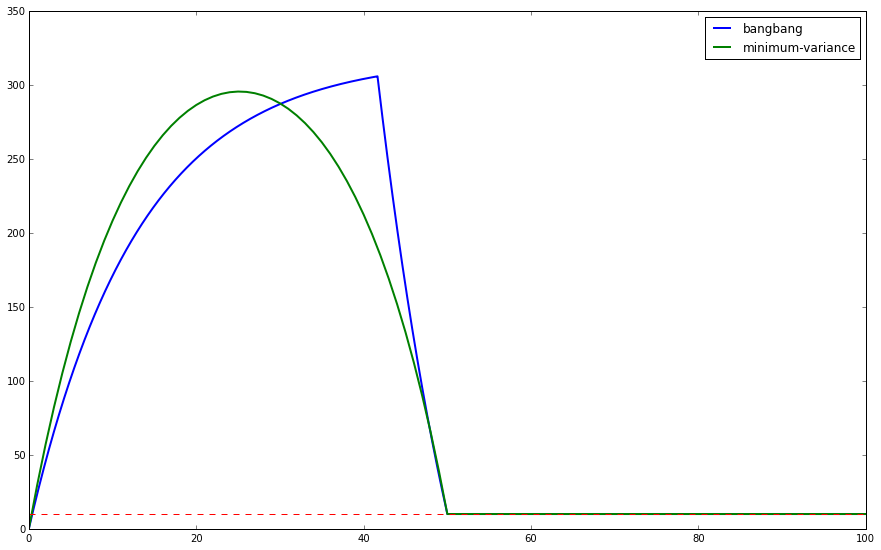

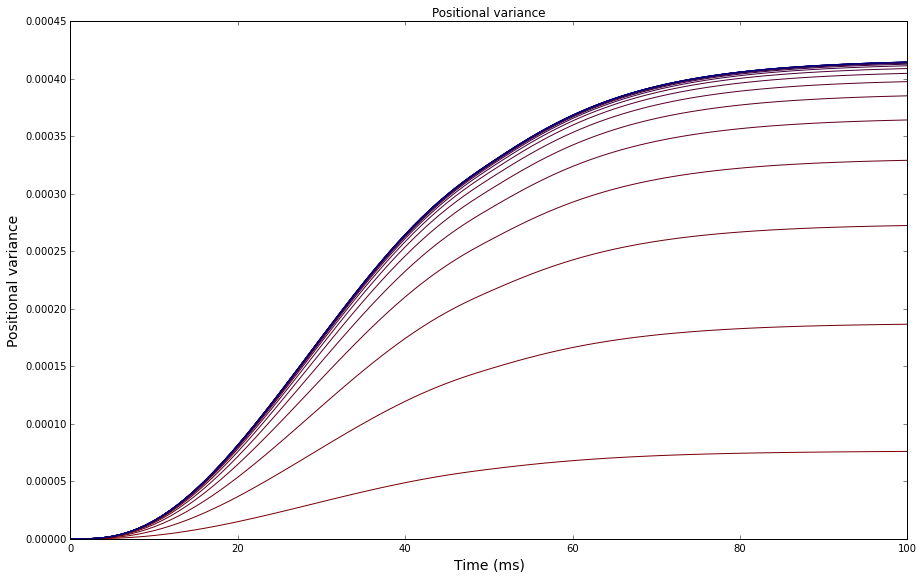

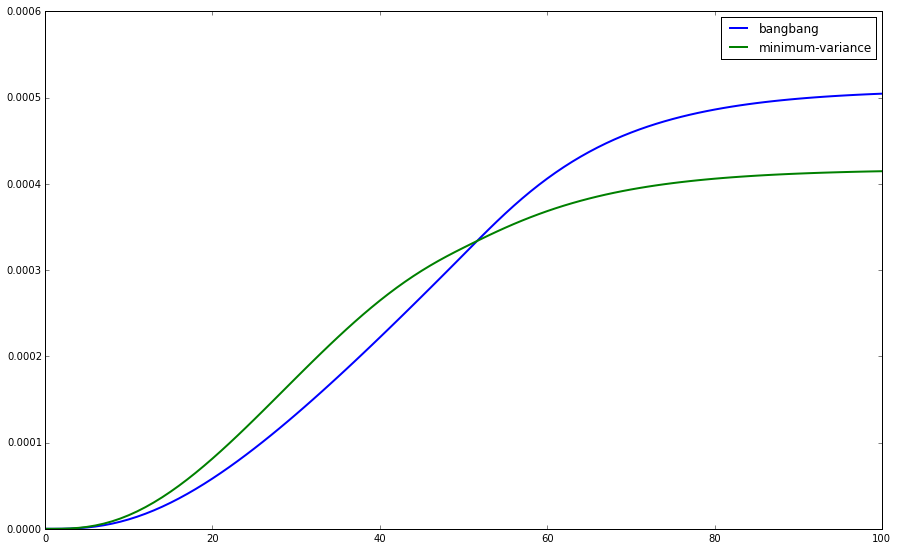

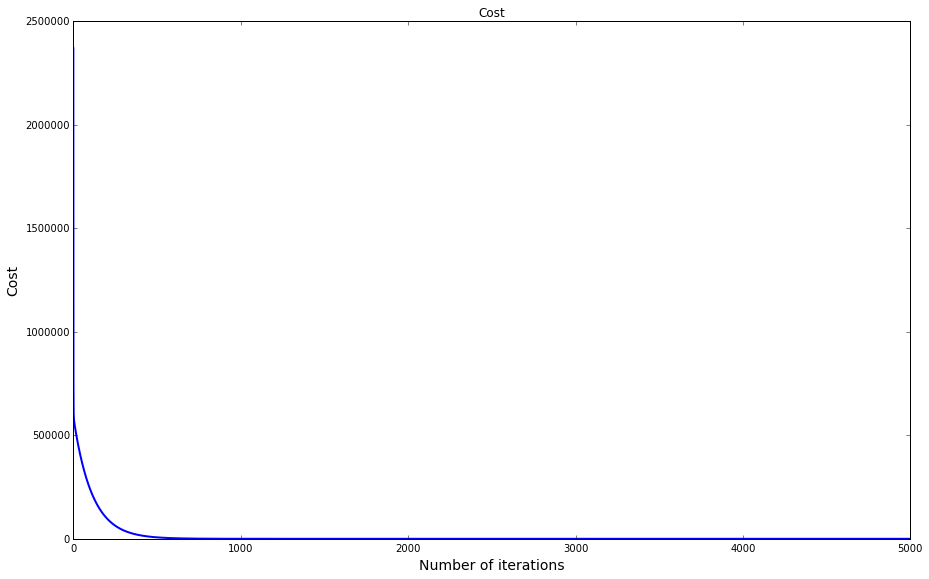

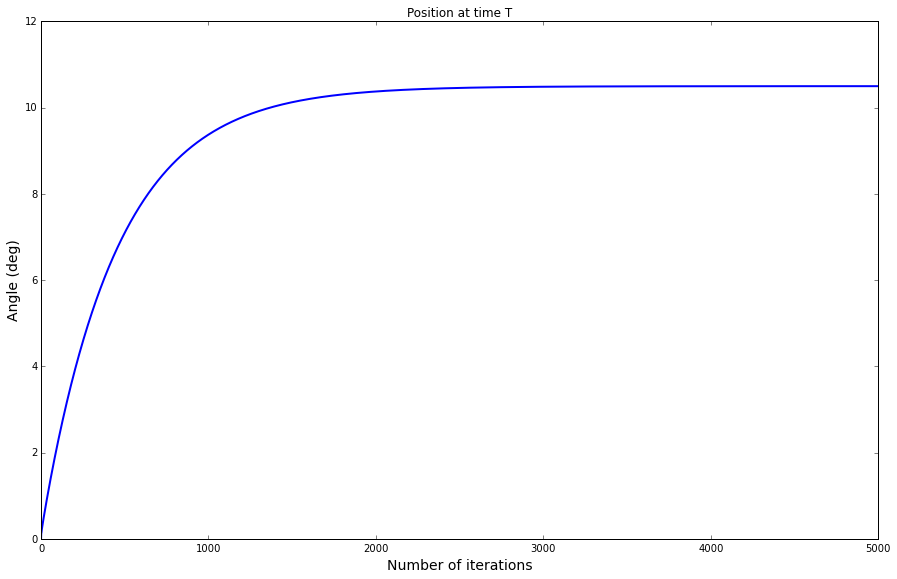

In [9]:
all_plots(record, bangdata, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [5]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=5.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=5.)

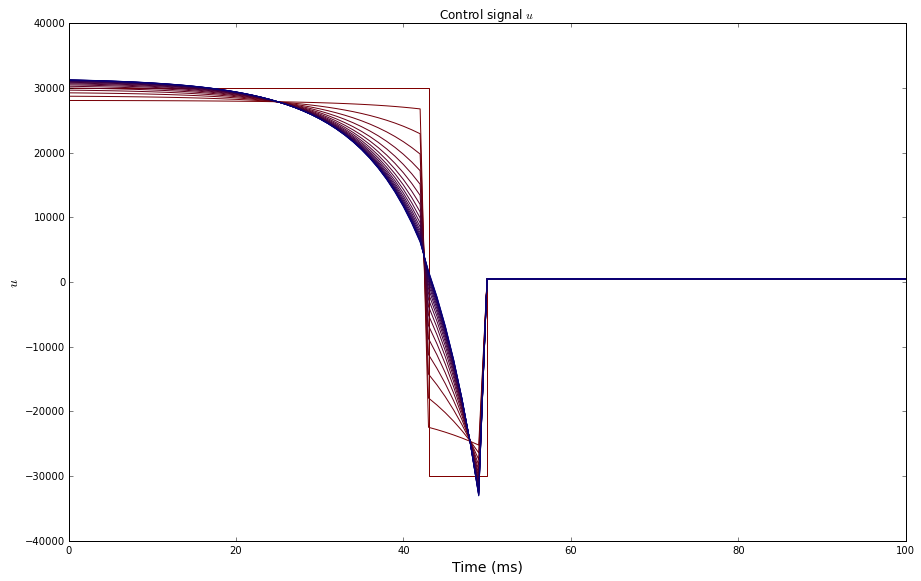

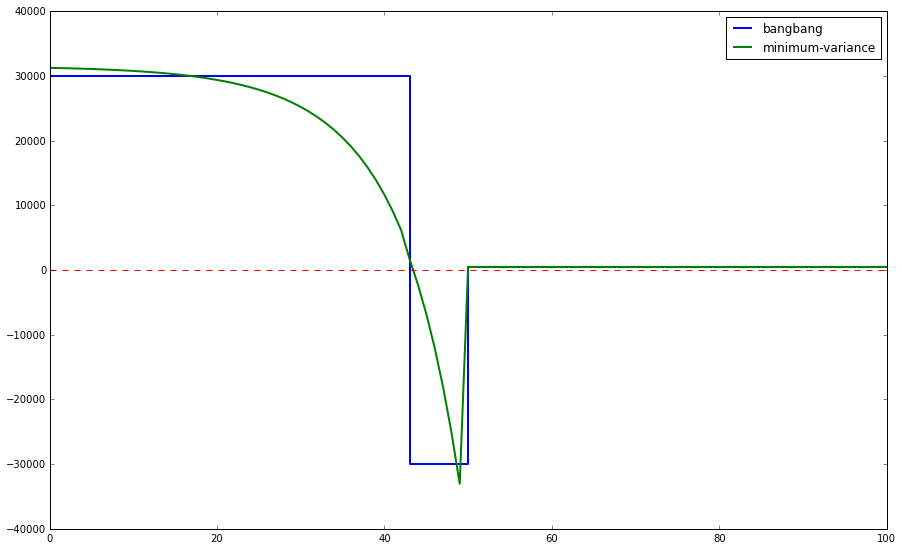

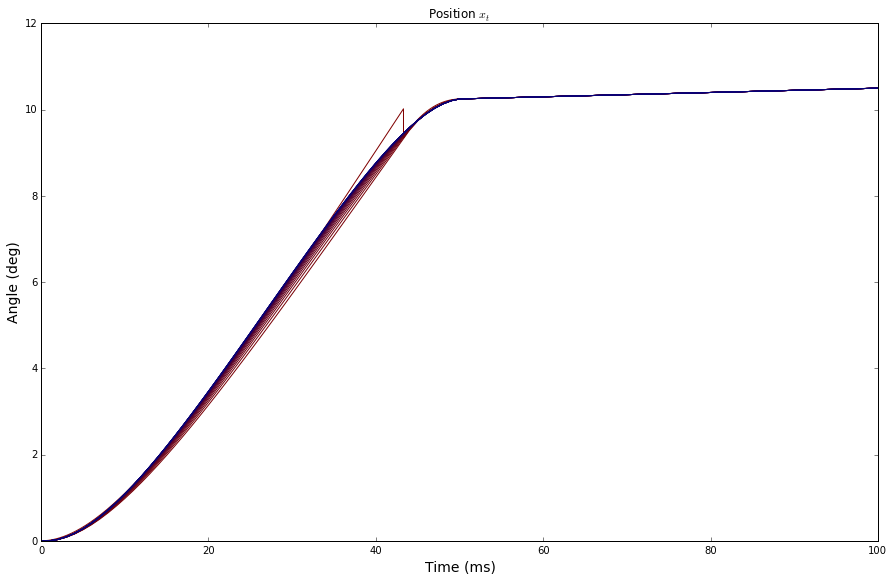

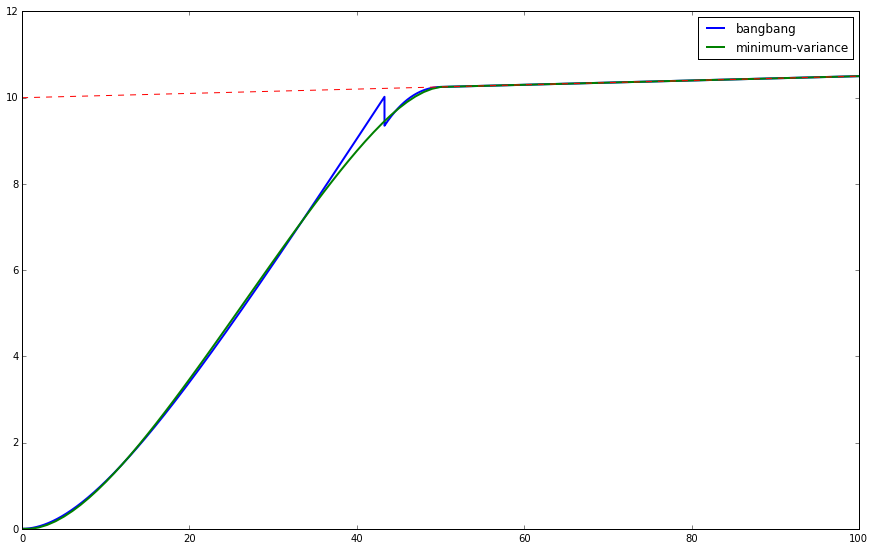

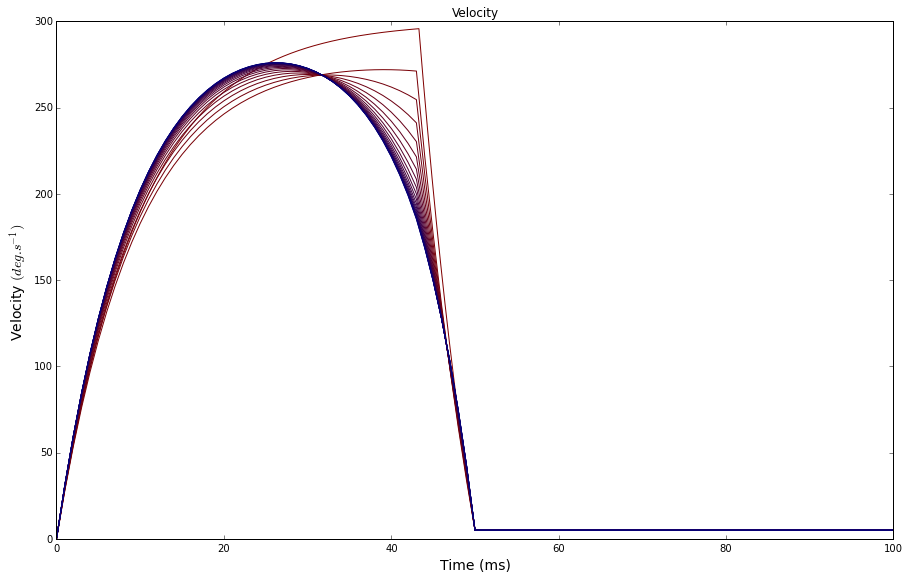

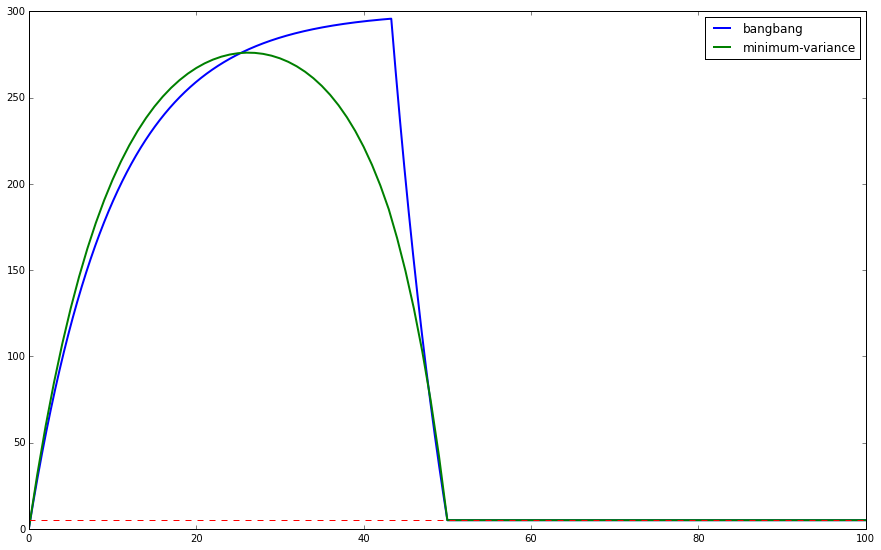

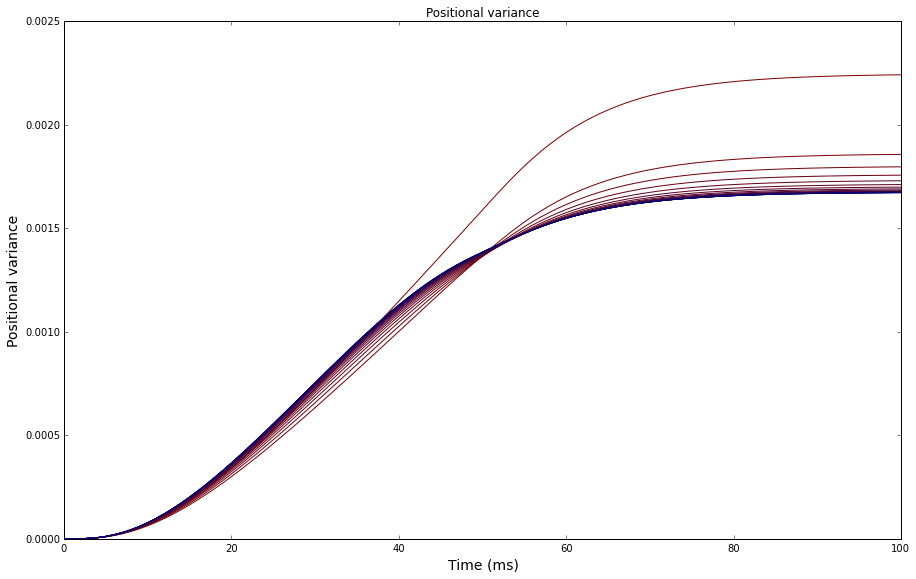

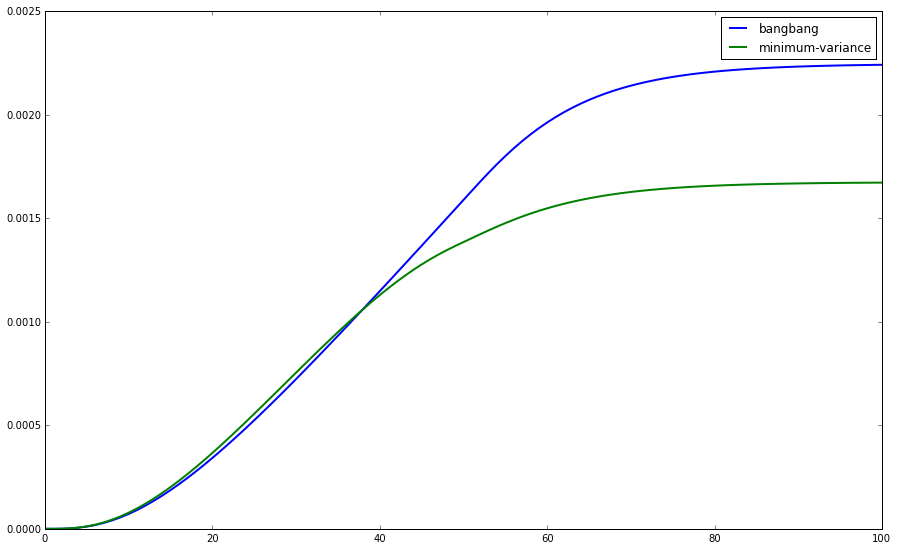

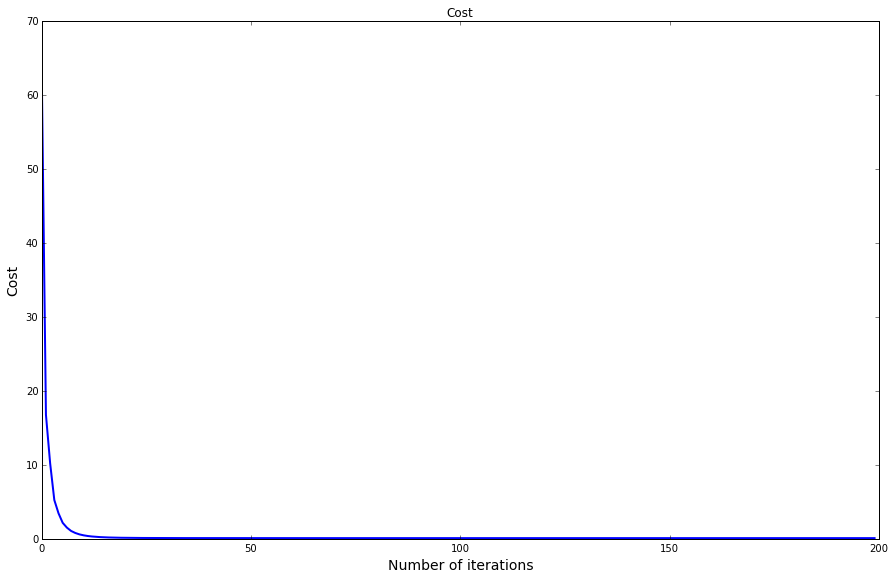

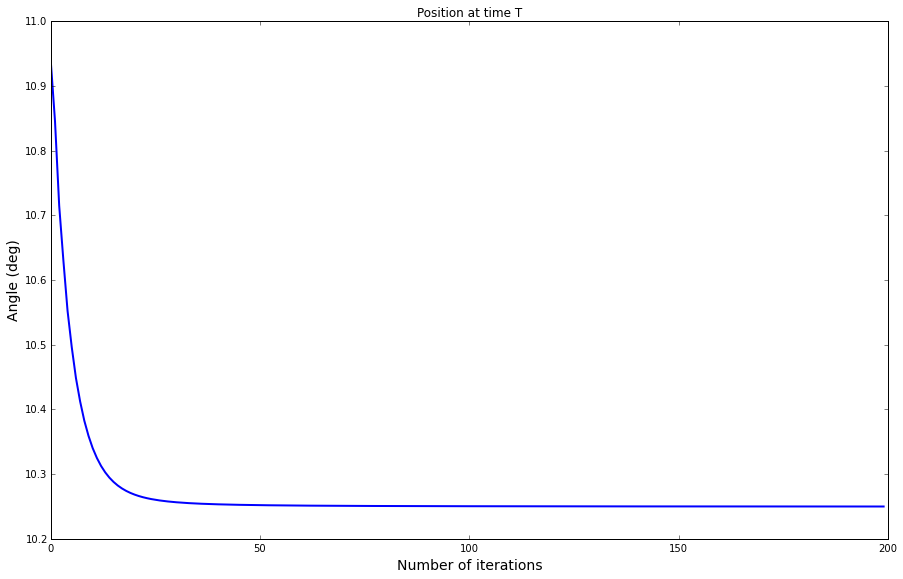

In [6]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [7]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=10.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=10.)

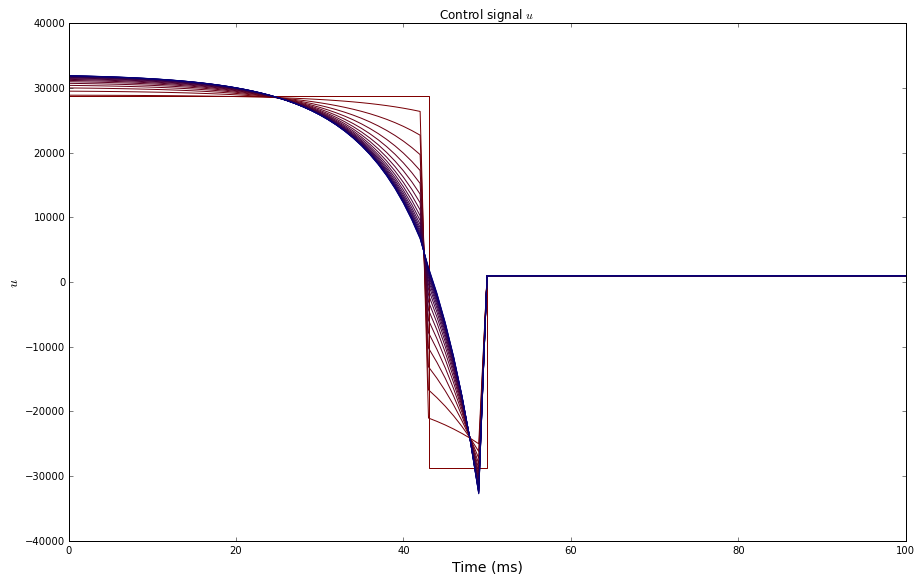

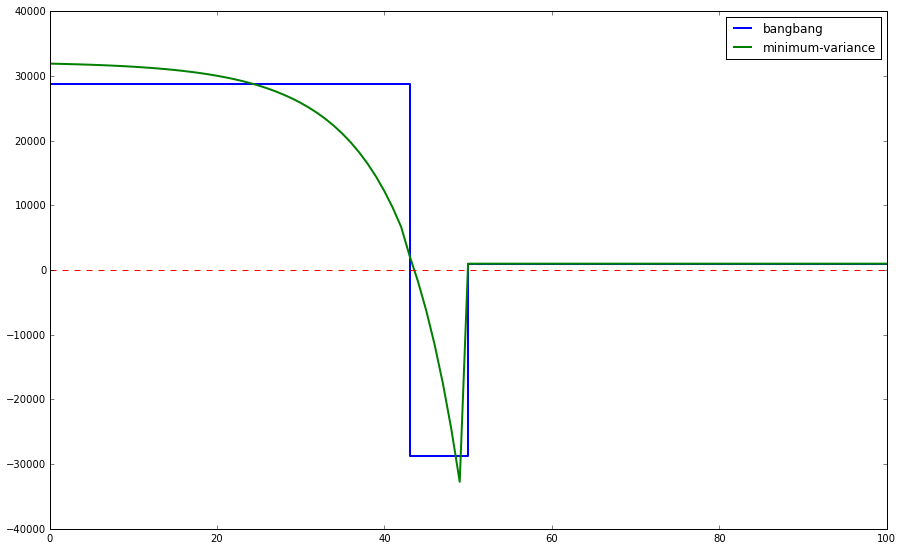

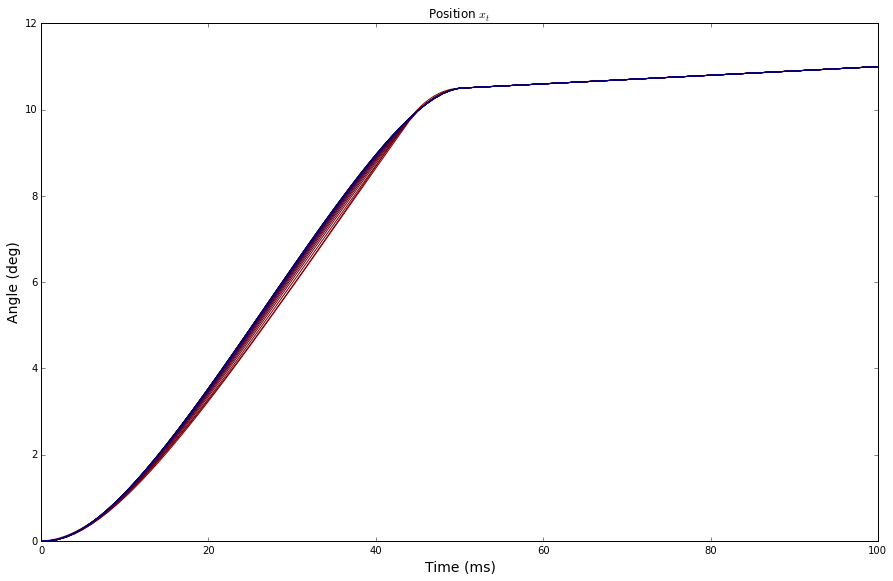

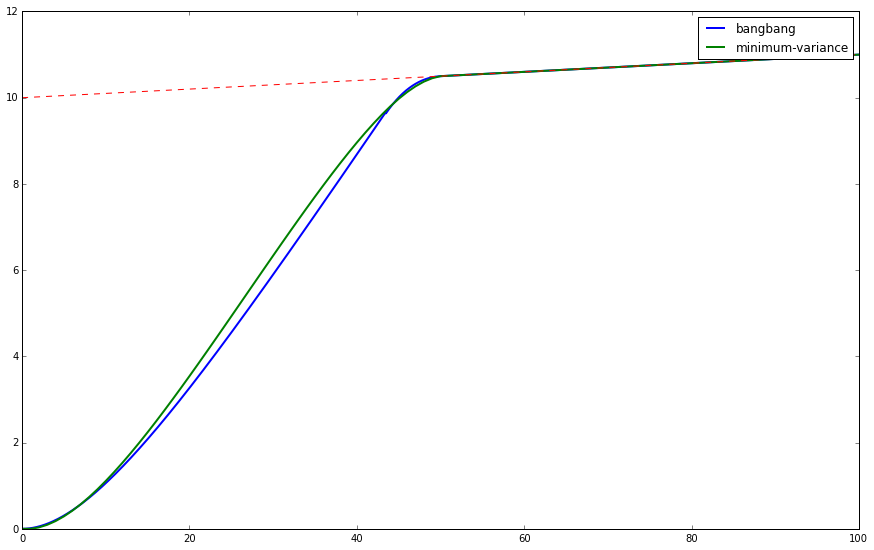

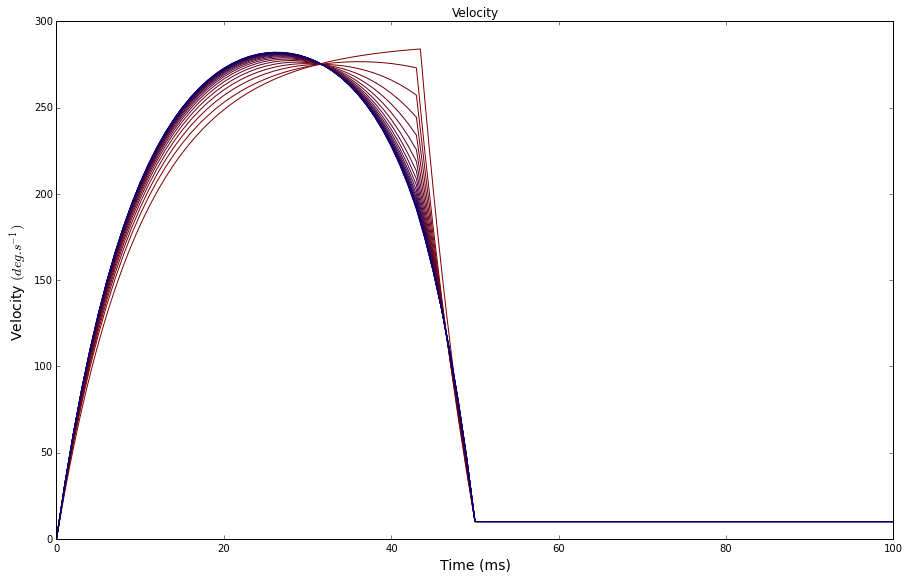

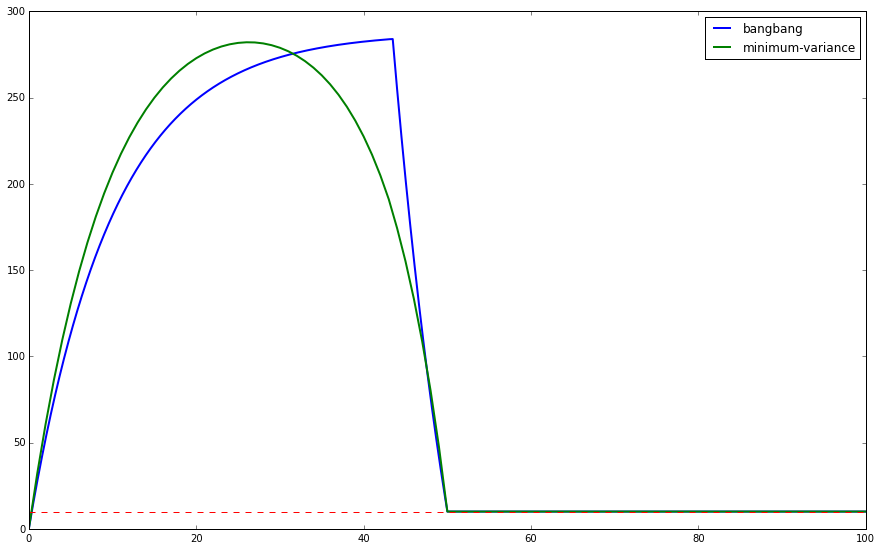

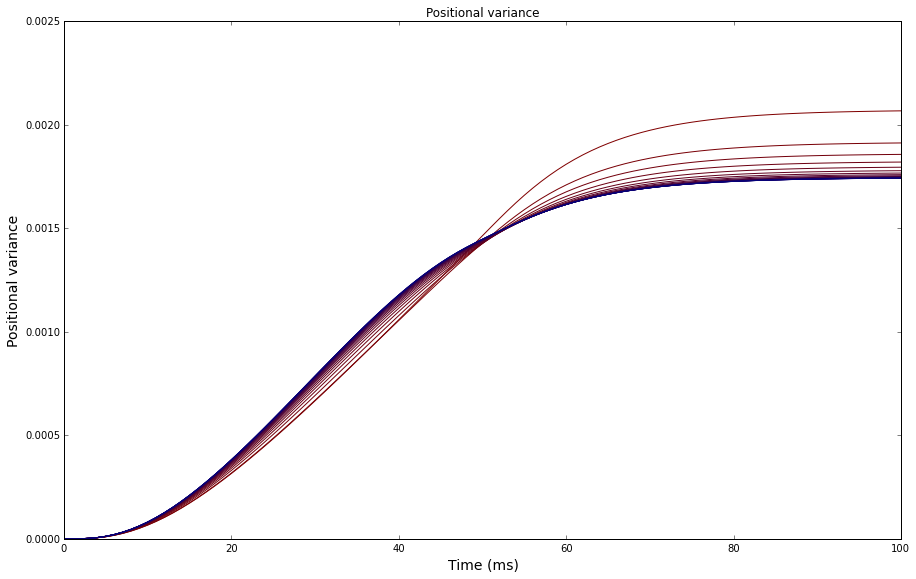

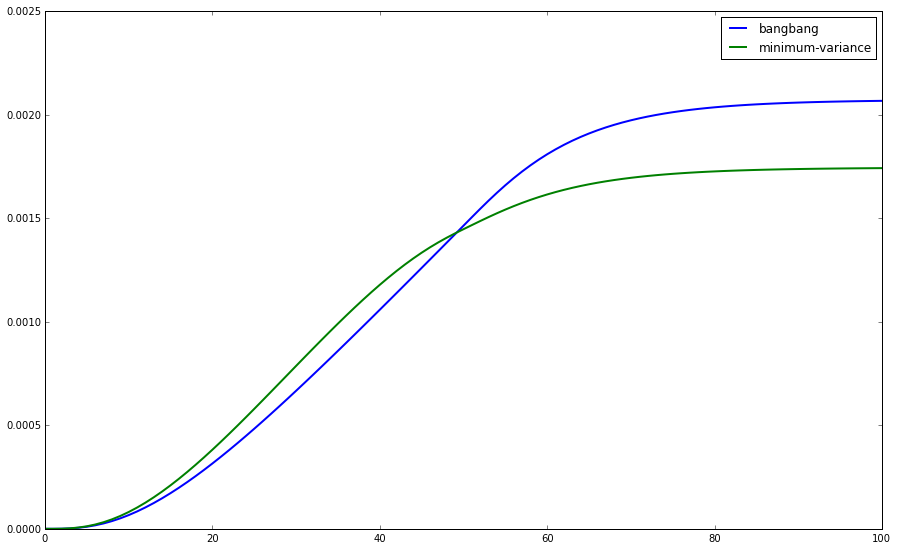

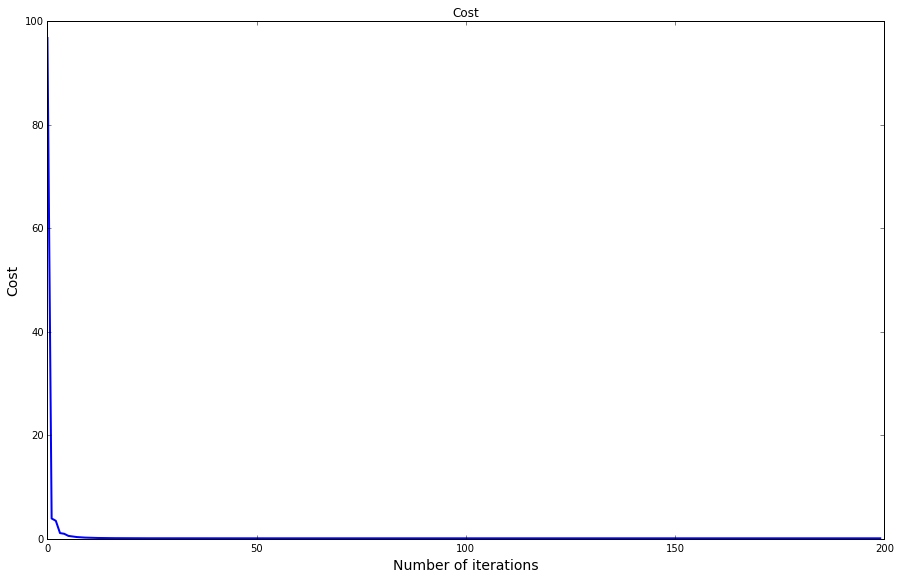

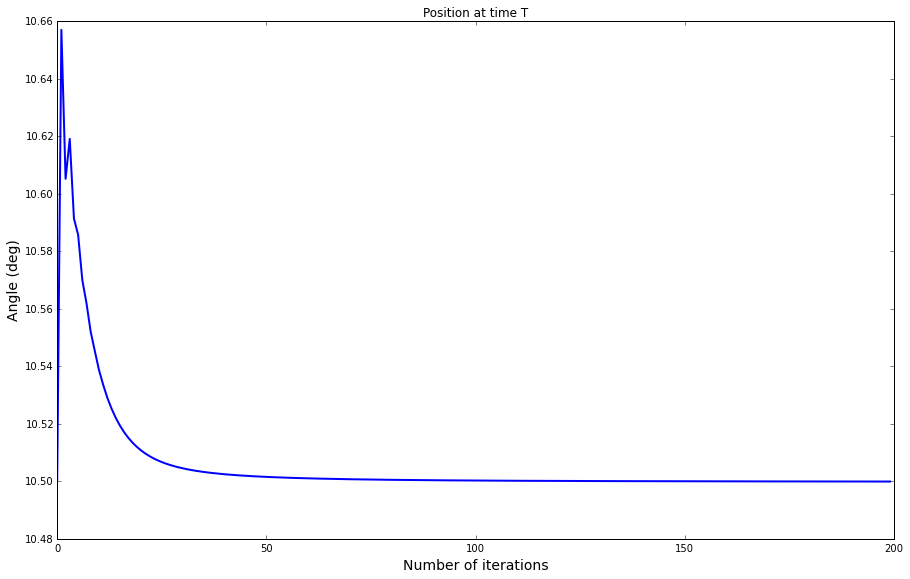

In [8]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [9]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=15.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=15.)

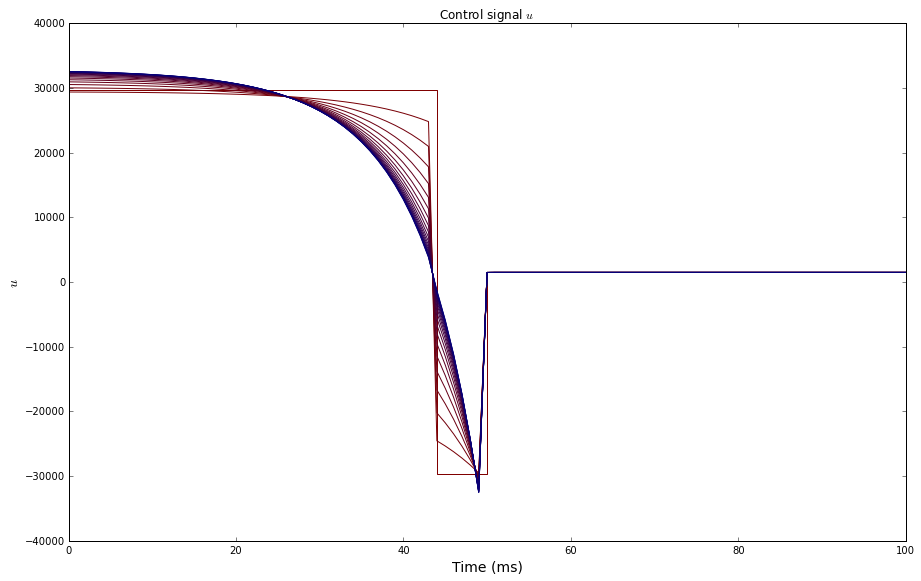

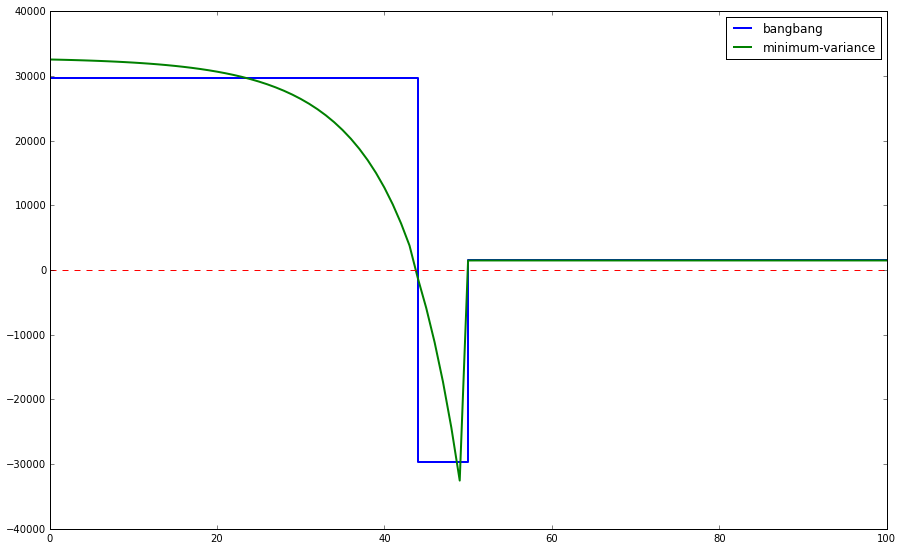

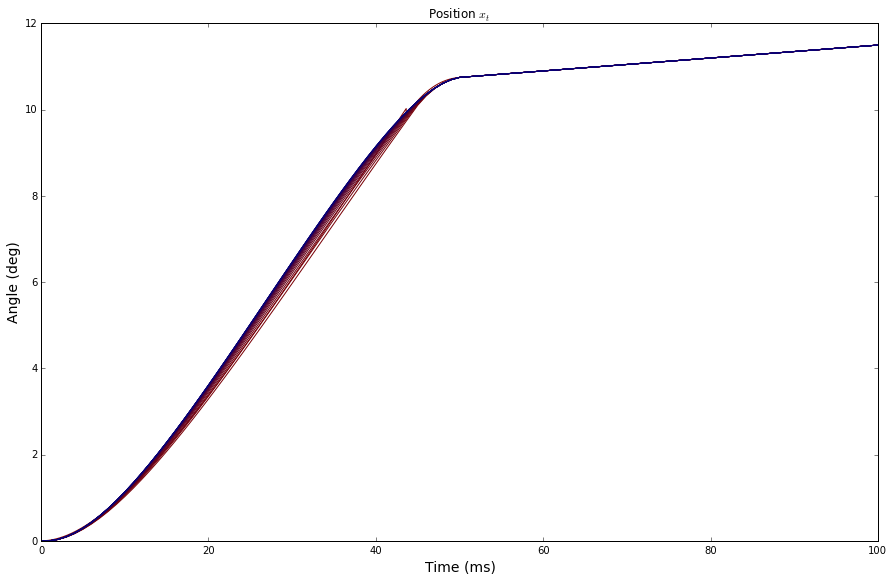

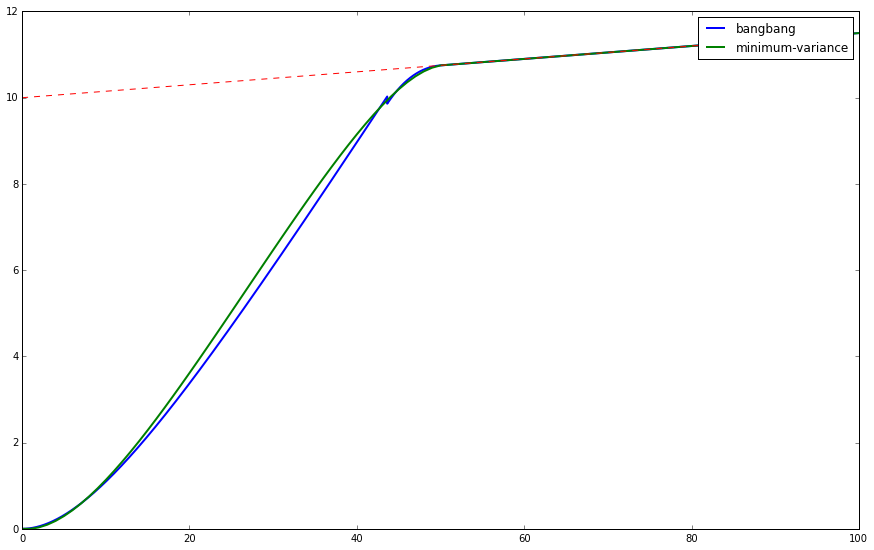

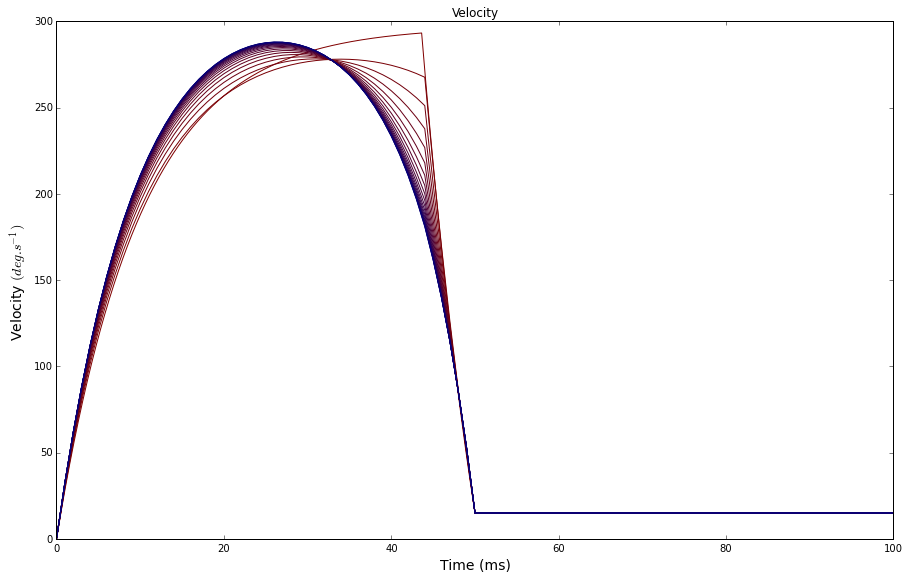

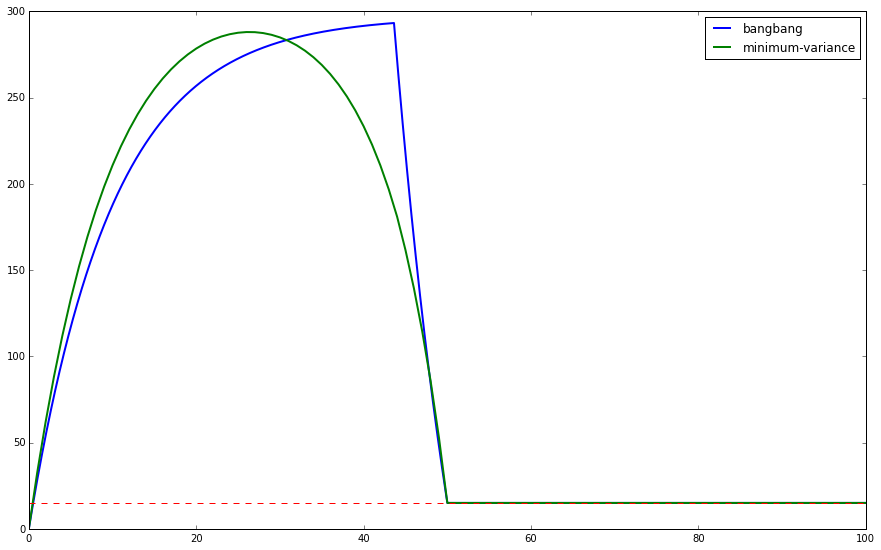

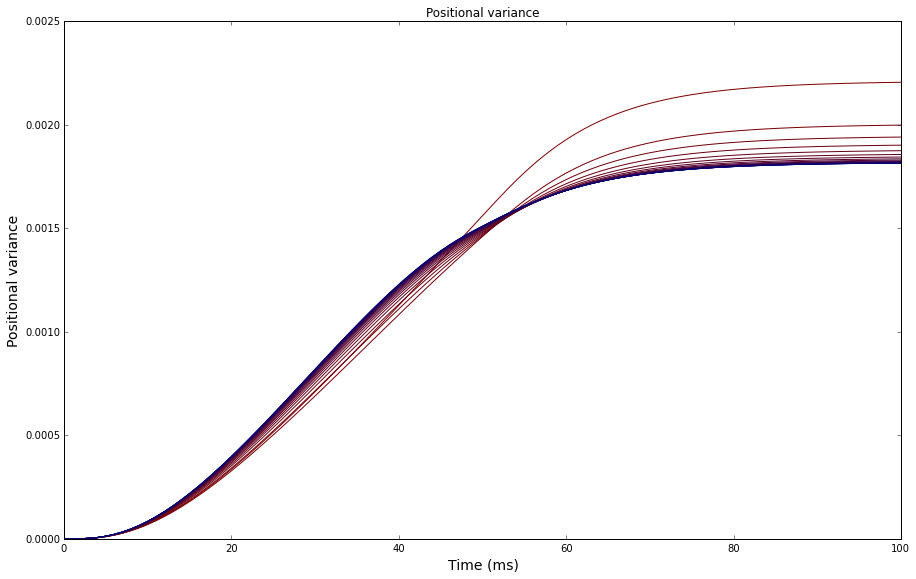

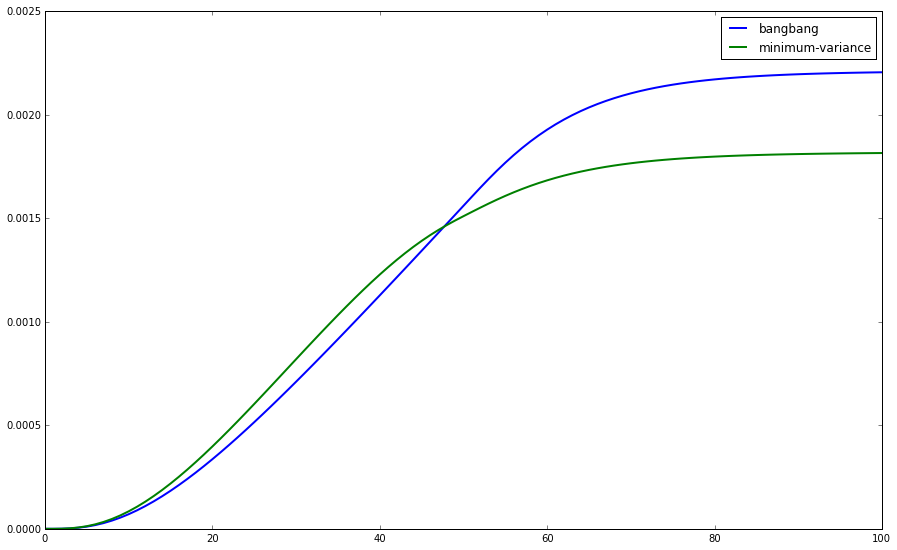

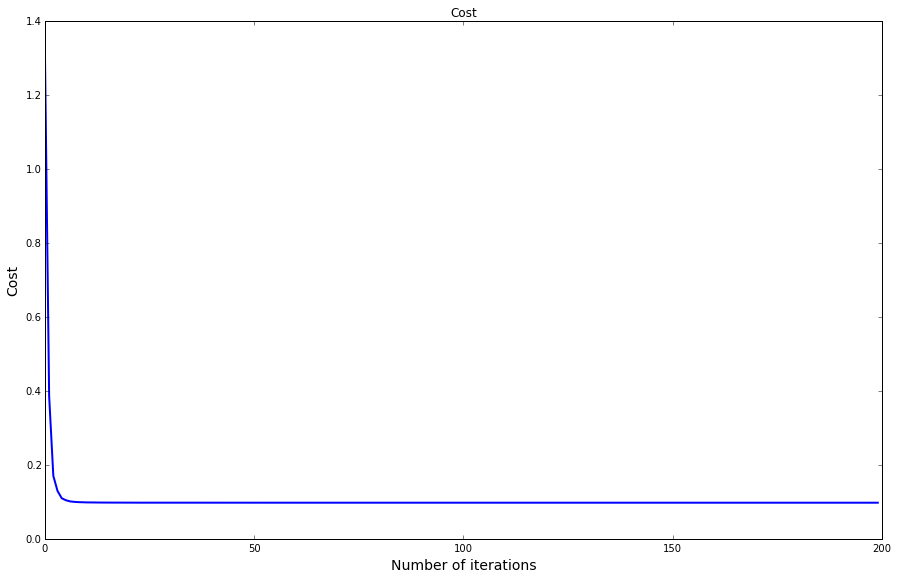

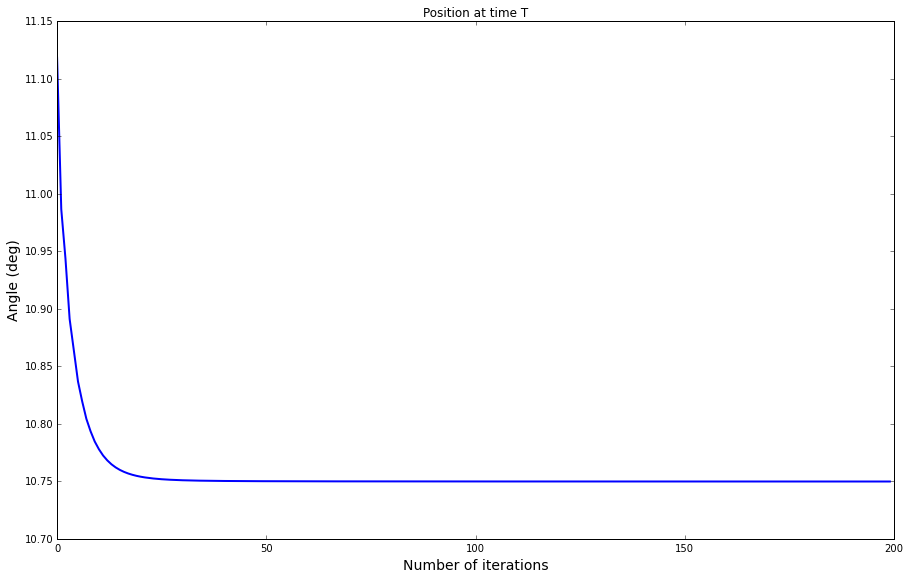

In [10]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [11]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=20.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=20.)

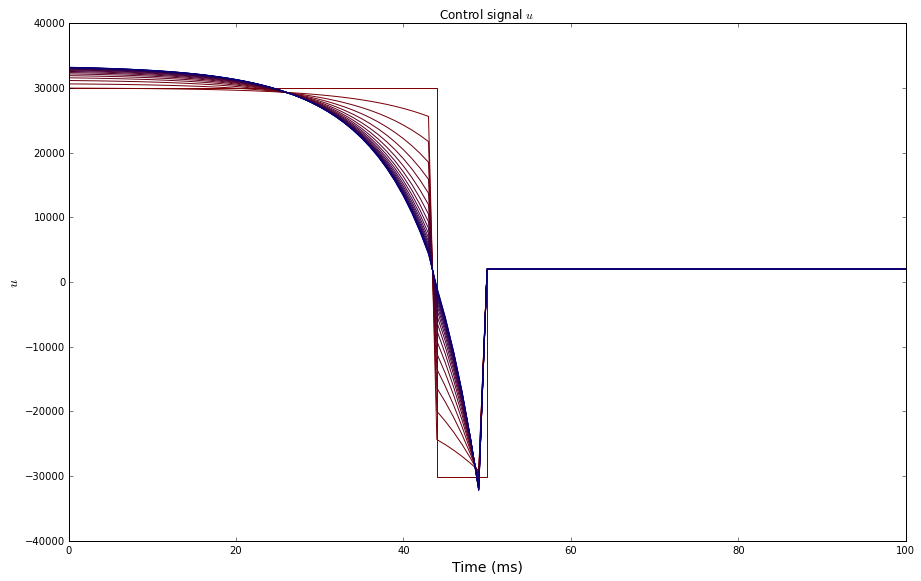

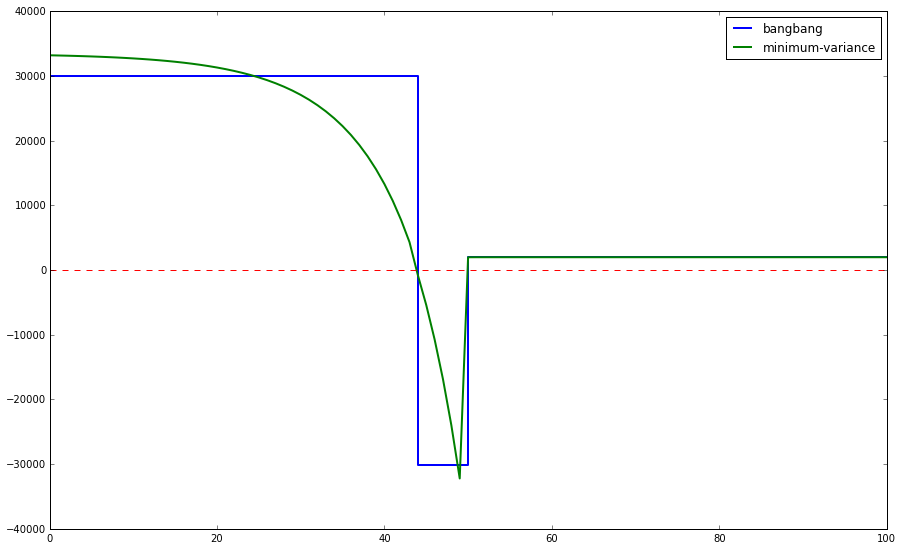

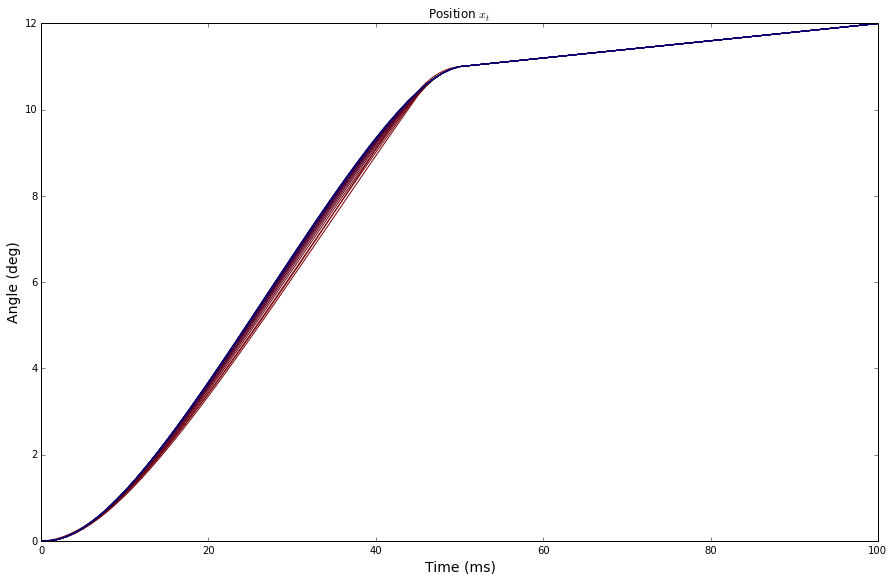

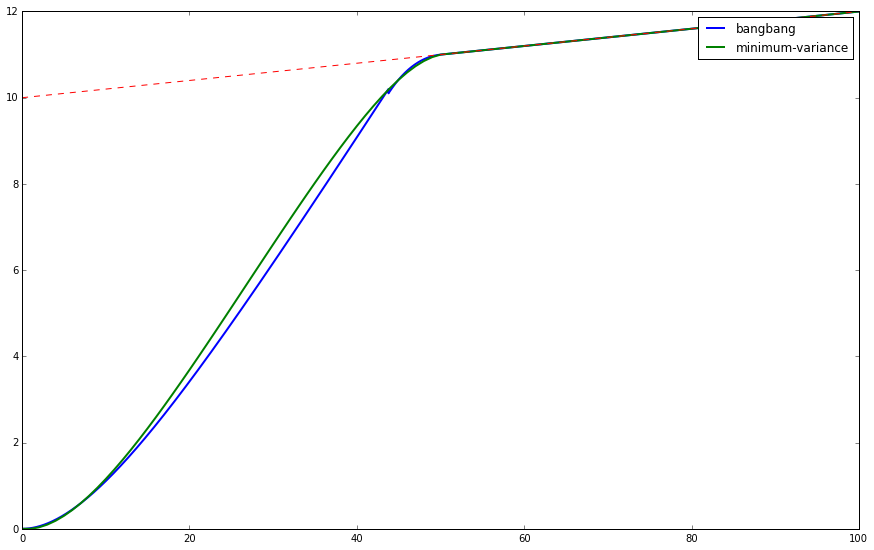

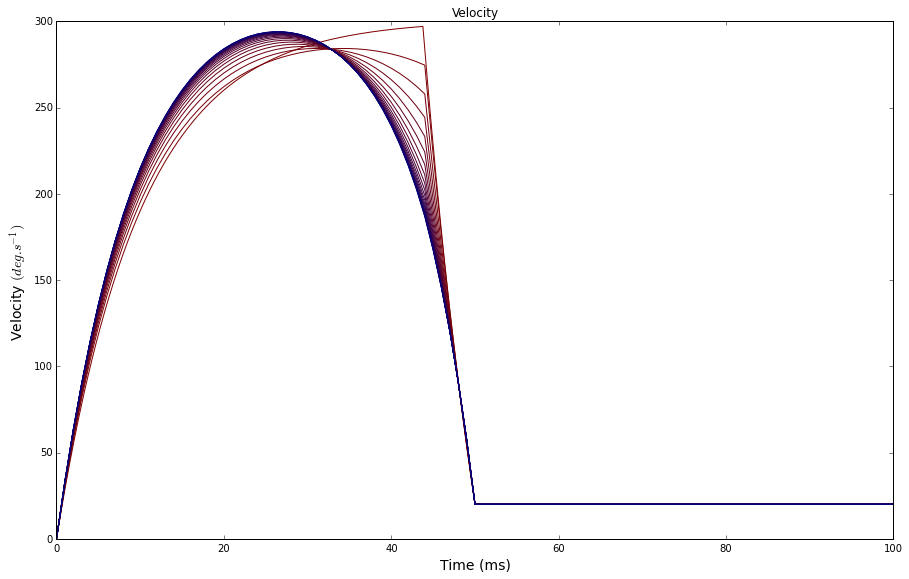

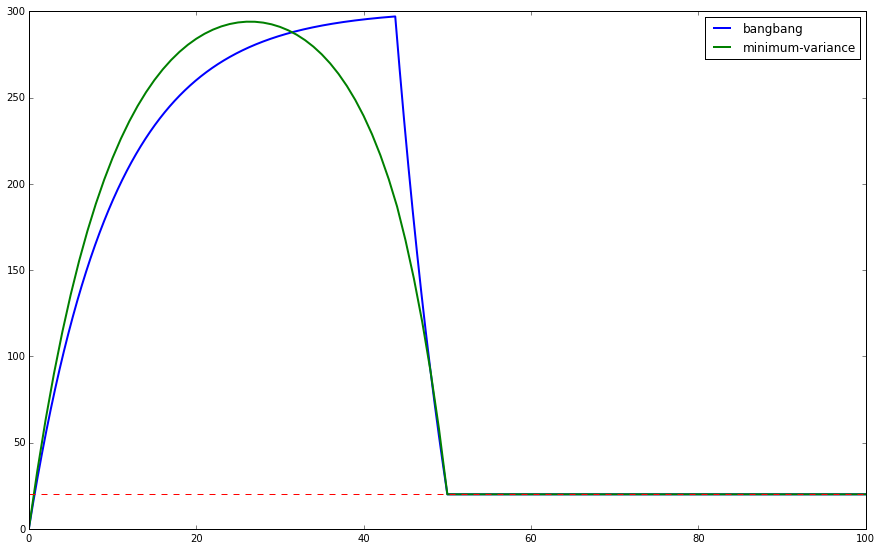

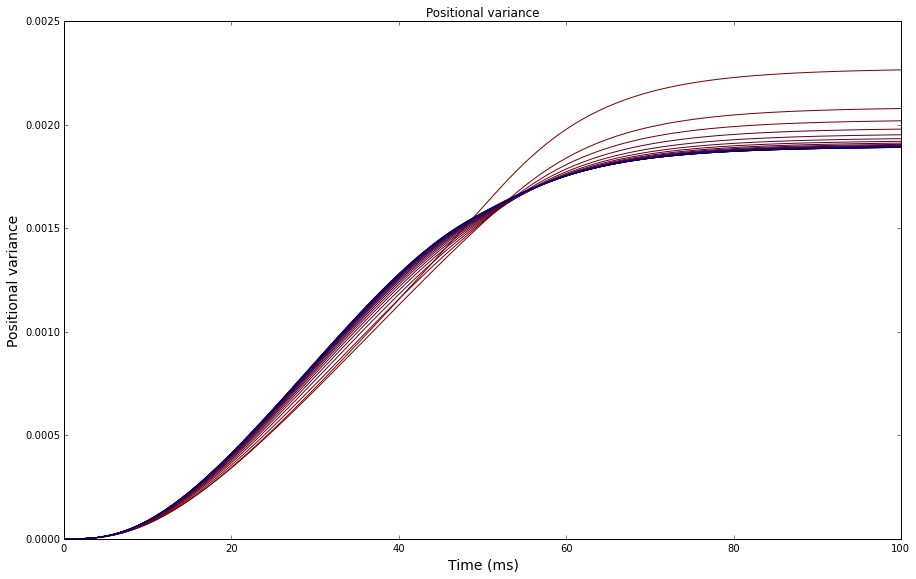

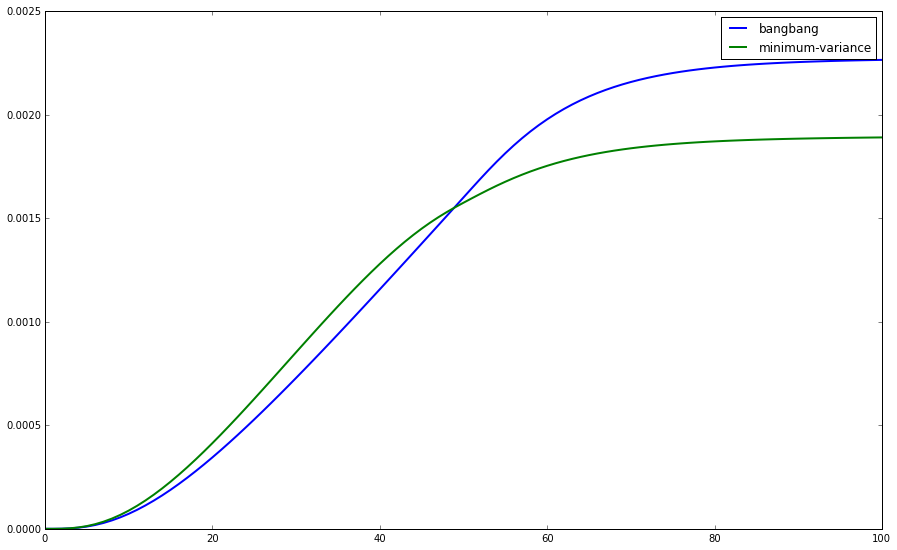

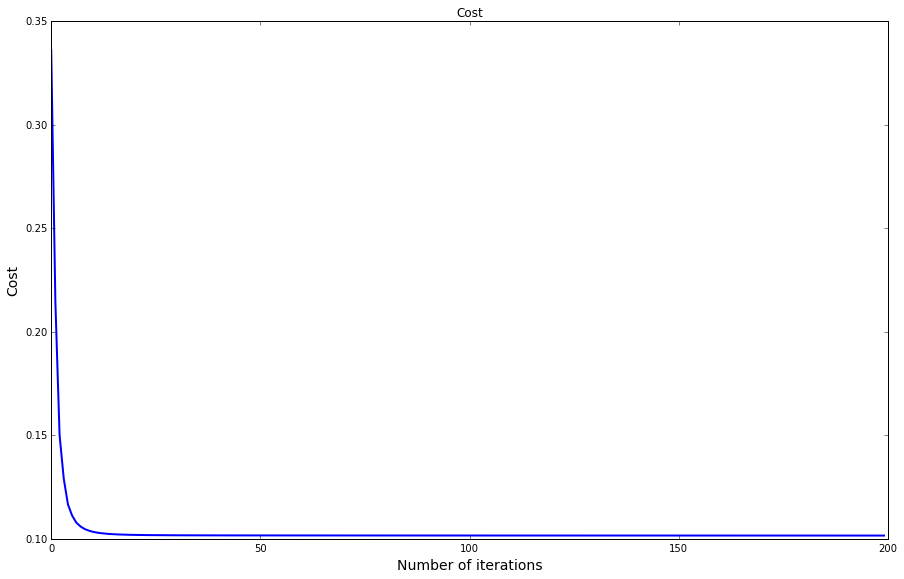

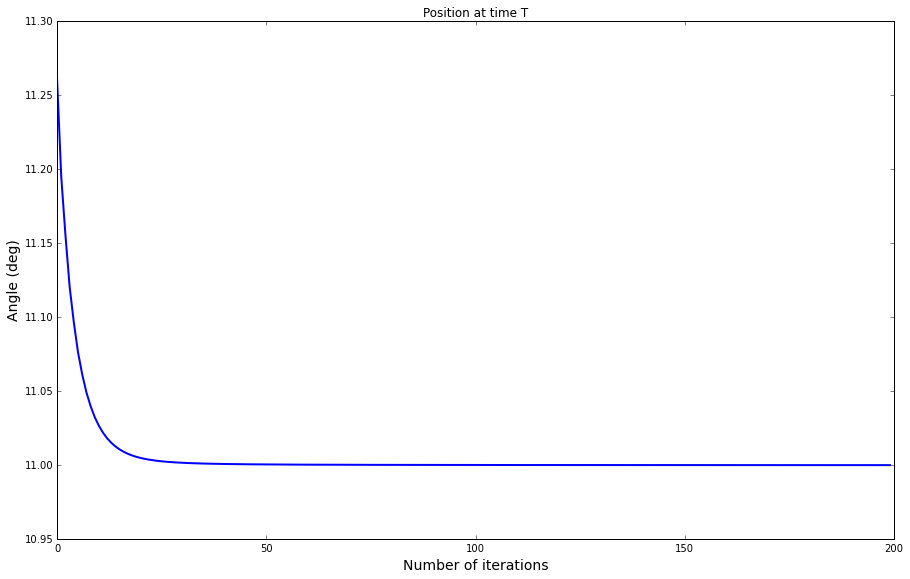

In [12]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)